In [ ]:
# medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

#downloading the data


In [ ]:
from pathlib import Path
import requests
csv_path=Path("data/")
file_path=csv_path/"csv_file"

if file_path.is_dir():
  print(f"directory {file_path} exists..")
else:
  file_path.mkdir(parents=True, exist_ok=True)

  #downloading the dataset..

  with open(csv_path/"medical-charges.csv","wb") as f:
    response=requests.get("https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv")
    print('downloading the file')
    f.write(response.content)

directory data/csv_file exists..


In [ ]:
import pandas as pd
medical_df=pd.read_csv("/content/data/medical-charges.csv")
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#information on data

In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

#data visualization

In [ ]:
#lets visualize for age

fig=px.histogram(
    medical_df,
    x="age",
    marginal="box",
    nbins=47,
    title='distribution of ages'
)
fig.update_layout(bargap=0.1)
fig.show()

the distribution shows that there are arund 20 to 30 customers of every age but the number of customers is very high for age of 18 and 19


In [ ]:
#bmi
fig=px.histogram(
    medical_df,
    x="bmi",
    marginal="box",
    title="distribution of bmi"
)
fig.update_layout(bargap=0.1)
fig.show()

The measurements of body mass index seem to form a Gaussian distribution centered around the value 30, with a few outliers towards the right.


In [ ]:
#charges(based on smoker or nonsmoker, you can also do based on gender aswell)

fig=px.histogram(
    medical_df,
    x="charges",
    marginal="box",
    color='smoker',
    title="charge distribution",
    color_discrete_sequence=["green","grey"]

)
fig.update_layout(bargap=0.1)
fig.show()

from the diagram we can see that

*   non smokers pay less then 10k per year whereas smokers pay more then 10k
*   most of the number of people pay less then 10k and only fraction of population pay  over 10k


*   if we see the bar diagram, we can see median of non smoker is 7.3k whereas smokers median is 34.4k








In [ ]:
#now lets visualize based on gender
fig=px.histogram(
    medical_df,
    x="charges",
    marginal="box",
    color='sex',
    title="charge distribution",
    color_discrete_sequence=["green","grey"]

)
fig.update_layout(bargap=0.1)
fig.show()

here , we can see that

*   more female have insurance charges compared to male
  



In [ ]:
#lets do based on region
#now lets visualize based on gender
fig=px.histogram(
    medical_df,
    x="charges",
    marginal="box",
    color='region',
    title="charge distribution",
    color_discrete_sequence=["green","grey"]

)
fig.update_layout(bargap=0.1)
fig.show()

now conclude yourself, im tired


In [ ]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [ ]:
fig=px.histogram(
    medical_df,
    x="smoker",
    marginal="box",
    color='sex',
    title="smokers based on gender",
    color_discrete_sequence=["green","grey"]

)
fig.update_layout(bargap=0.1)
fig.show()

from here we can see number of male for both yes and no is more then female


In [ ]:
#now lets visualize using scatter plot
fig=px.scatter(
    medical_df,
    x="age",
    y="charges",
    color="smoker",
    hover_data=['sex'],
    title="age vs charges"
)
fig.update_traces(marker_size=5)
fig.show()

we can see that as the age increases charges also tend to increaase. there are 3 main clusters

*   the lowest clusters consists of healthy non smokers
*   the middle cluster is mixture of smokers and non smokers with more medical charges then first clusters, it may be the overlap between non smokers with health issues and smoker with no major health issues

*   the top cluster consists of smokers with health issues who have more charges






In [ ]:
#now lets visualize between bmi and charges

fig=px.scatter(
    medical_df,
    x="bmi",
    y="charges",
    color="smoker",
    hover_data=["sex"],
    title="bmi vs charges"
)

fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

Correlation

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the correlation coefficient, which can be computed using the .corr method of a Pandas series.

In [ ]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [ ]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [ ]:
#for smoker, we first need to asign no as 0 and yes as 1 since correlation can work only on numeric value

smoker_values={
    "no":0,
    "yes":1
}

smoker_numeric=medical_df.smoker.map(smoker_values)

In [ ]:
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [ ]:
medical_df.corr()

ValueError: could not convert string to float: 'female'

In [ ]:
# Calculate correlations for numeric columns only
medical_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'correlation matrix')

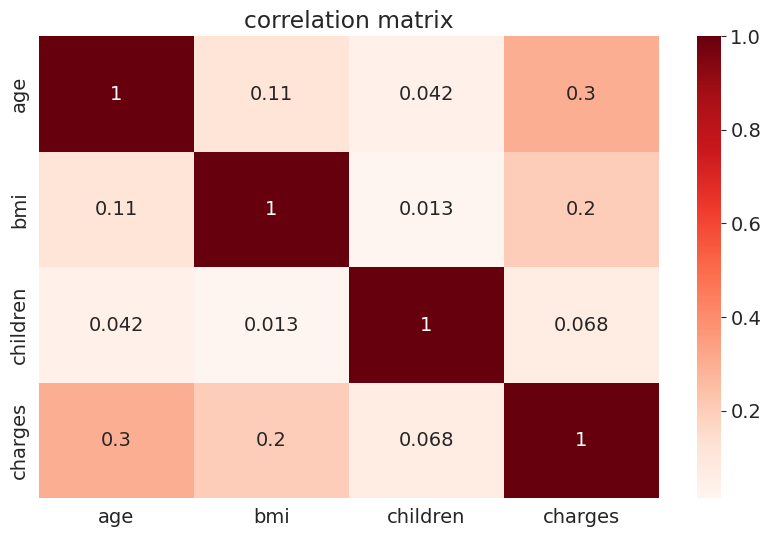

In [ ]:
#now lets visualize using heatmap
sns.heatmap(medical_df.corr(numeric_only=True),cmap="Reds", annot=True)
plt.title("correlation matrix")

#now its time for linear regression


We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.


In [ ]:
non_smoker_df=medical_df[medical_df.smoker=="no"]

In [ ]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: title={'center': 'age vs charges'}, xlabel='age', ylabel='charges'>

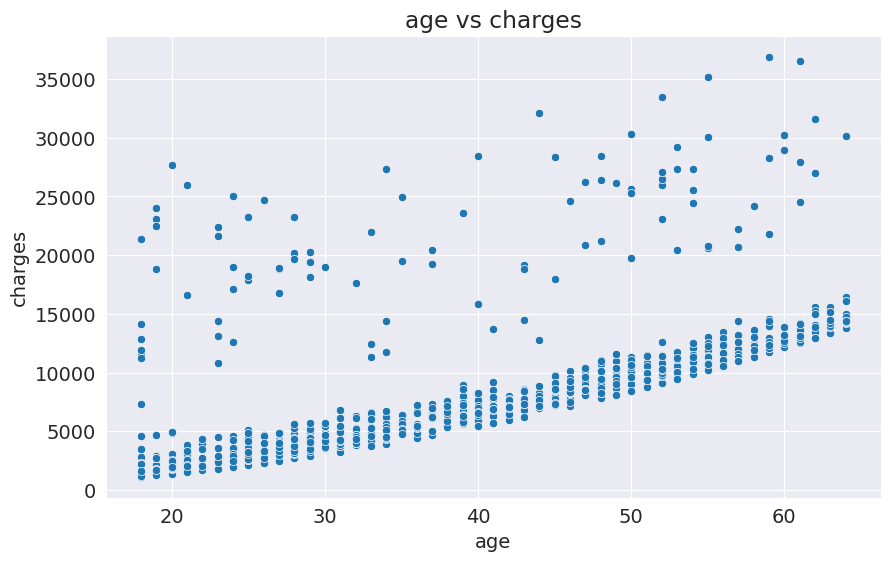

In [ ]:
plt.title("age vs charges")
sns.scatterplot(
    non_smoker_df,
    x="age",
    y="charges"
)

In [ ]:
#we wil use y=mx+c form
def estimate(age, w, b):
  return w*age+b



In [ ]:
w=50
b=100
ages=non_smoker_df.age
estimate_charges=estimate(ages,w,b)

Text(0, 0.5, 'Estimated Charges')

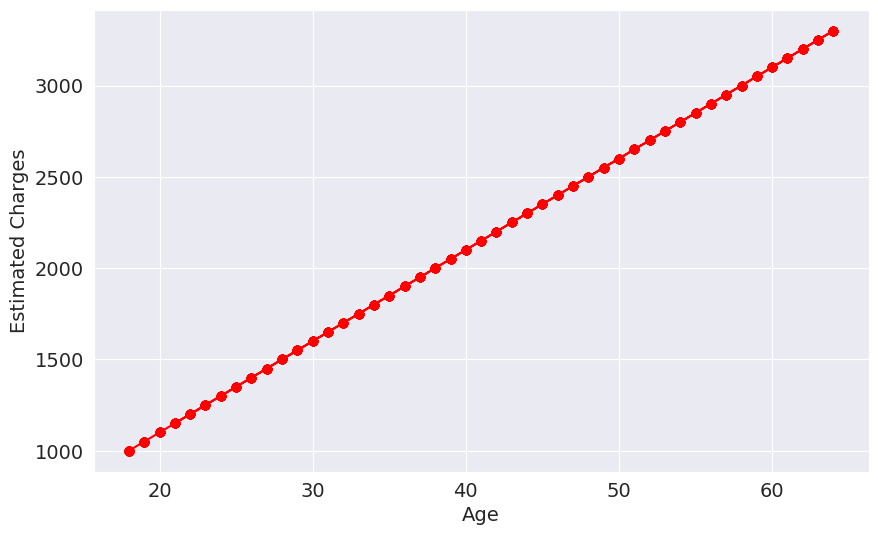

In [ ]:
plt.plot(ages,estimate_charges,'r-o')
plt.xlabel('Age');
plt.ylabel('Estimated Charges')

In [ ]:
#now lets compare our st linewith the actual data
#but first lets define the target
target=non_smoker_df.charges
target

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

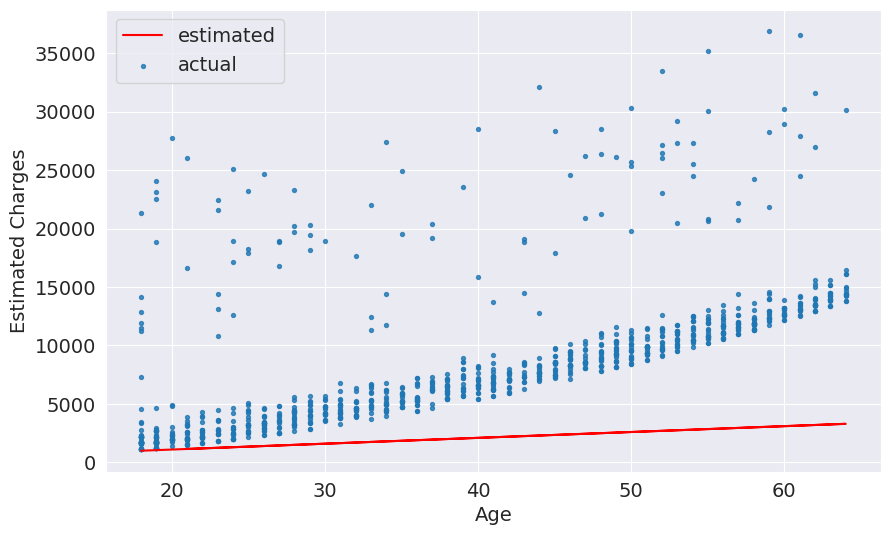

In [ ]:
plt.plot(ages,estimate_charges,'r')

plt.scatter(
    ages,target,
    s=8,alpha=0.8

)

plt.xlabel('Age')
plt.ylabel('Estimated Charges')
plt.legend(['estimated','actual'])

our line is worse compared to the line we wanted, so lets update the value of w and b


In [ ]:
def update(w,b):
  ages=non_smoker_df.age
  target=non_smoker_df.charges

  estimate_charges=estimate(ages,w,b)
  plt.plot(ages,estimate_charges,'r')

  plt.scatter(
      ages,target,
      s=8,alpha=0.8
  )
  plt.xlabel('Age')
  plt.ylabel('Estimated Charges')
  plt.legend(['estimated','actual'])

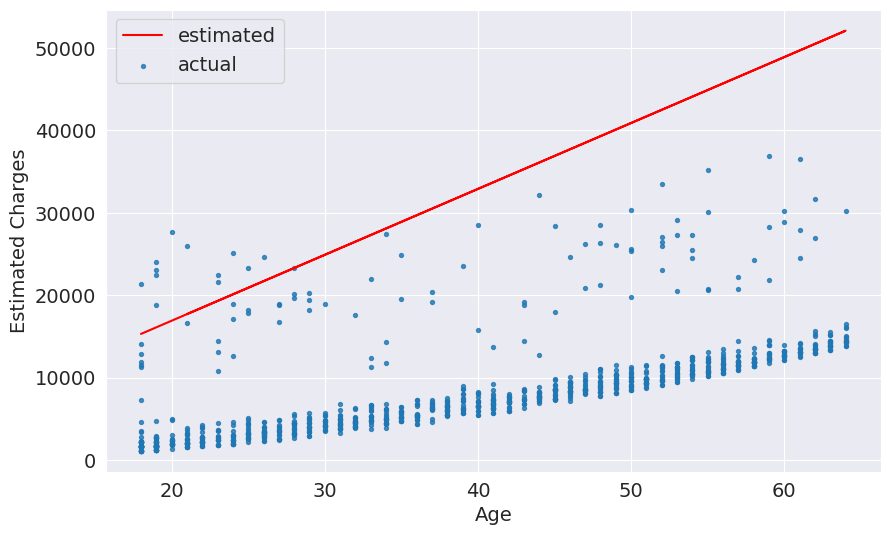

In [ ]:
update(800,900)

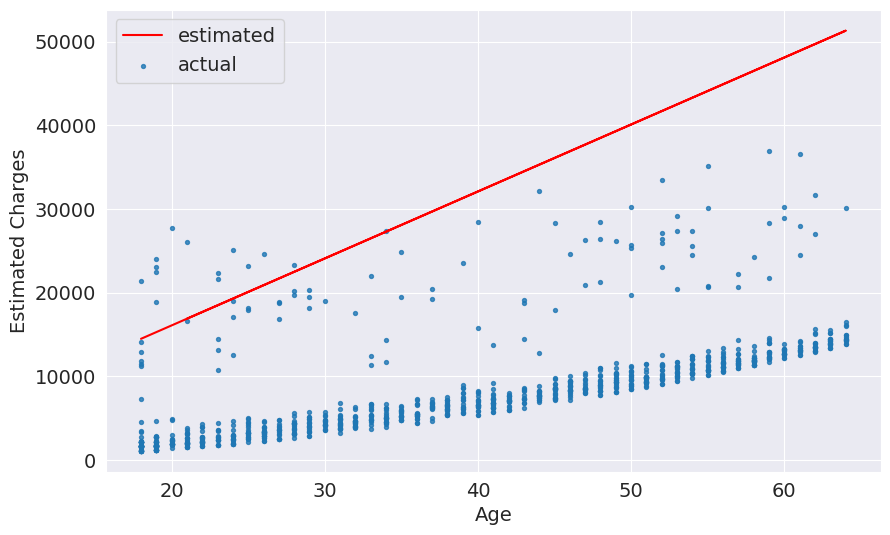

In [ ]:
update(800,90)

In [ ]:
#now its time for defining cost/loss function



In [ ]:
import numpy as np
def rmse(actual,predicted):
  return np.sqrt(np.mean(np.square(actual-predicted)))

In [ ]:
#everything you did til now was just for concept, all these can easily be done by using skitlearn
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model

LinearRegression()

In [ ]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
#accoring to detail, input ie x must be of 2d
input=non_smoker_df[['age']]
input

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [ ]:
target=non_smoker_df.charges
target

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [ ]:
input.shape, target.shape

((1064, 1), (1064,))

In [ ]:
model.fit(input,target)

LinearRegression()

In [ ]:
predictions=model.predict(input)
predictions


array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
rmse(predictions,target)

4662.505766636395

In [ ]:
#the value of w and b are saved which can be checked , lets check
model.coef_,model.intercept_

(array([267.24891283]), -2091.4205565650864)

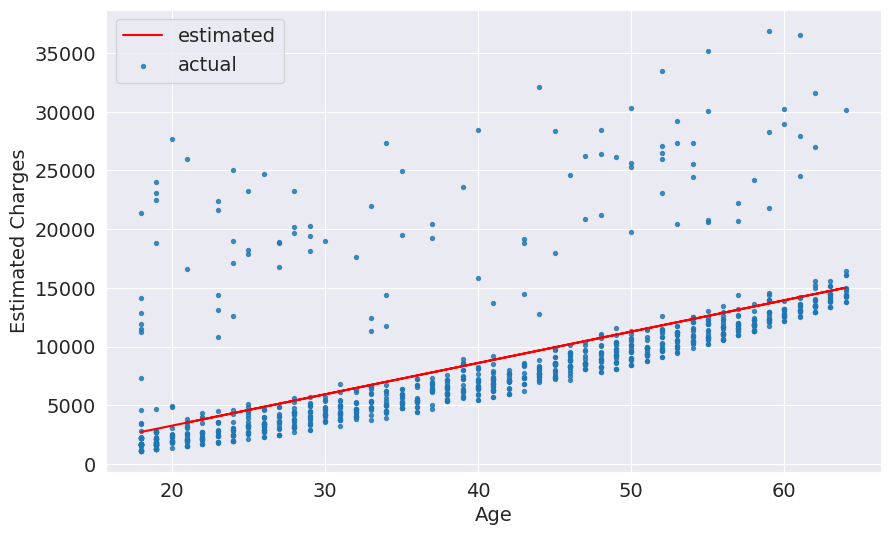

In [ ]:
# now lets replace these value in our function
update(model.coef_,model.intercept_)

EXERCISE: Use the SGDRegressor class from scikit-learn to train a model using the stochastic gradient descent technique. Make predictions and compute the loss. Do you see any difference in the result?

In [ ]:
from sklearn.linear_model import SGDRegressor
model_1=SGDRegressor()
model_1.fit(input,target)

SGDRegressor()

In [ ]:
prediction_1=model_1.predict(input)
prediction_1

array([15735.67446199, 24848.6452854 , 29405.13069711, ...,
       15735.67446199, 15735.67446199, 18469.56570901])

In [ ]:
rmse(prediction_1,target)

28664.040460728516

In [ ]:
model_1.coef_,model_1.intercept_

(array([911.29708234]), array([-667.67302017]))

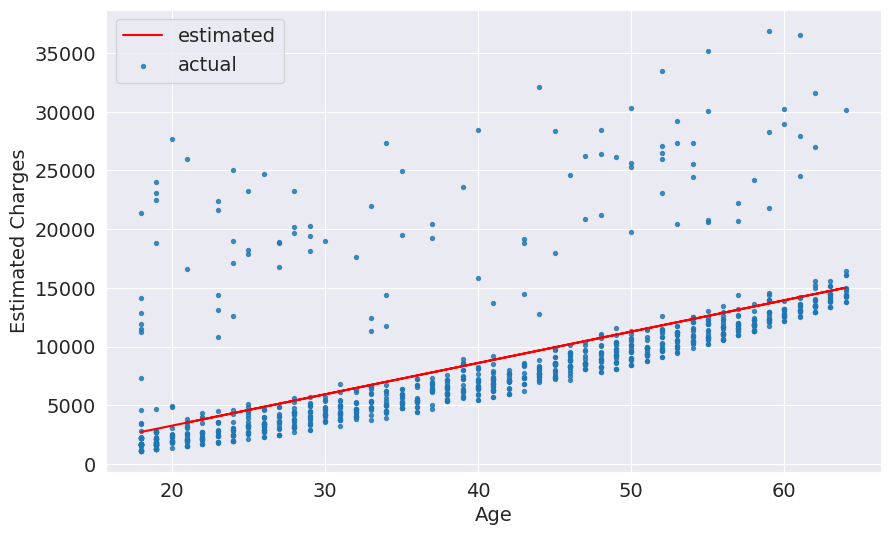

In [ ]:
update(model.coef_,model.intercept_)

#now lets repeat same for non smokers..homework


# New Section

In [ ]:
inputs,targets=non_smoker_df[["age"]],non_smoker_df["charges"]

In [ ]:
model_1.fit(inputs,targets)

SGDRegressor()

In [ ]:
predictions=model_1.predict(inputs)
predictions

array([1633.06340945, 5154.32018851, 6914.94857804, ..., 1633.06340945,
       1633.06340945, 2689.44044317])

In [ ]:
rmse(predictions,targets)

4868.070220239029

In [ ]:
model_1.coef_,model_1.intercept_

(array([352.12567791]), array([-4705.19879285]))

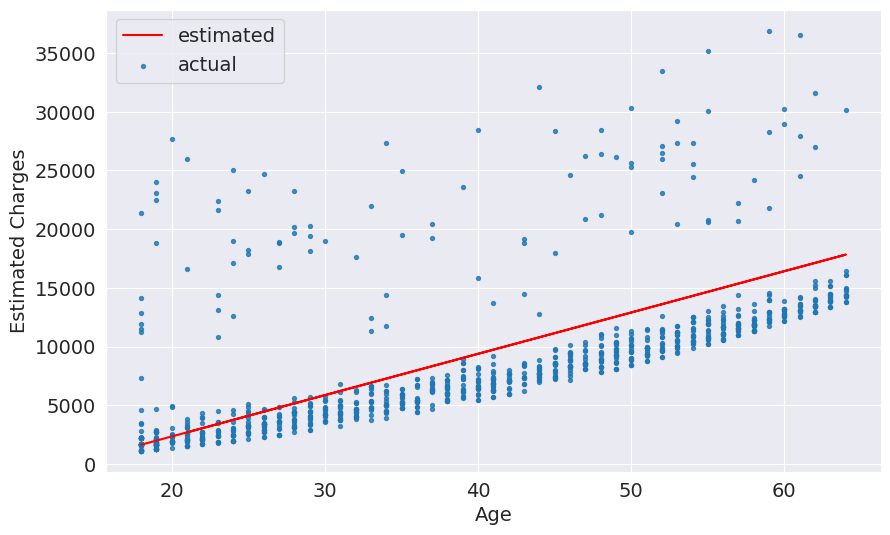

In [ ]:
update(model_1.coef_,model_1.intercept_)

so far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:

charges=w1×age+w2×bmi+bcharges=w1​×age+w2​×bmi+b

We need to change just one line of code to include the BMI.

In [ ]:
inputs,targets=non_smoker_df[["age","bmi"]],non_smoker_df["charges"]
model.fit(inputs,targets)
predictions=model.predict(inputs)
predictions

array([2749.08516308, 5412.40282772, 6673.94368635, ..., 2735.99553127,
       2770.87763119, 3493.32334862])

In [ ]:
rmse(predictions,targets)

4662.3128354612945

As you can see, adding the BMI doesn't seem to reduce the loss by much, as the BMI has a very weak correlation with charges, especially for non smokers.

In [ ]:
non_smoker_df.bmi.corr(non_smoker_df.charges)

0.0840365431283327

In [ ]:
fig=px.scatter(
    non_smoker_df,
    x="bmi",
    y="charges",
    title="bmi vs charges"
)
fig.show()

In [ ]:
fig=px.scatter_3d(
    non_smoker_df,
    x="bmi",
    y="age",
    z="charges",
    title="bmi and age vs charges"
)
fig.update_traces(marker_size=3)
fig.show()

You can see that it's harder to interpret a 3D scatter plot compared to a 2D scatter plot. As we add more features, it becomes impossible to visualize all feature at once, which is why we use measures like correlation and loss.

Let's also check the parameters of the model.

Let's go one step further, and add the final numeric column: "children", which seems to have some correlation with "charges".

charges=w1×age+w2×bmi+w3×children+bcharges=w1​×age+w2​×bmi+w3​×children+b

In [ ]:
non_smoker_df.children.corr(non_smoker_df.charges)

0.13892870453542194

In [ ]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038247


#EXERCISE: Repeat the steps is this section to train a linear regression model to estimate medical charges for smokers. Visualize the targets and predictions, and compute the loss.

#Using Categorical Features for Machine Learning

lets visualize smoker which has only yes and no


<Axes: xlabel='smoker', ylabel='charges'>

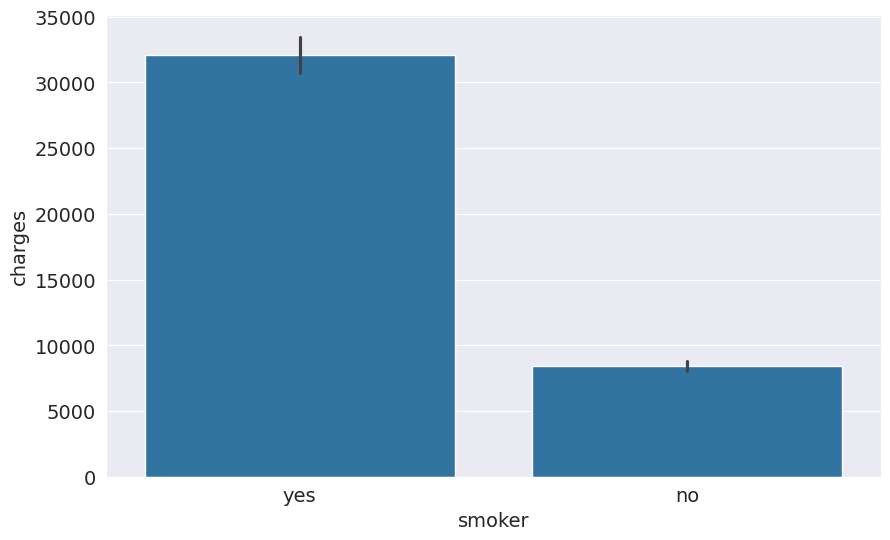

In [ ]:
sns.barplot(medical_df,x="smoker",y="charges")

In [ ]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

<Axes: xlabel='smoker', ylabel='charges'>

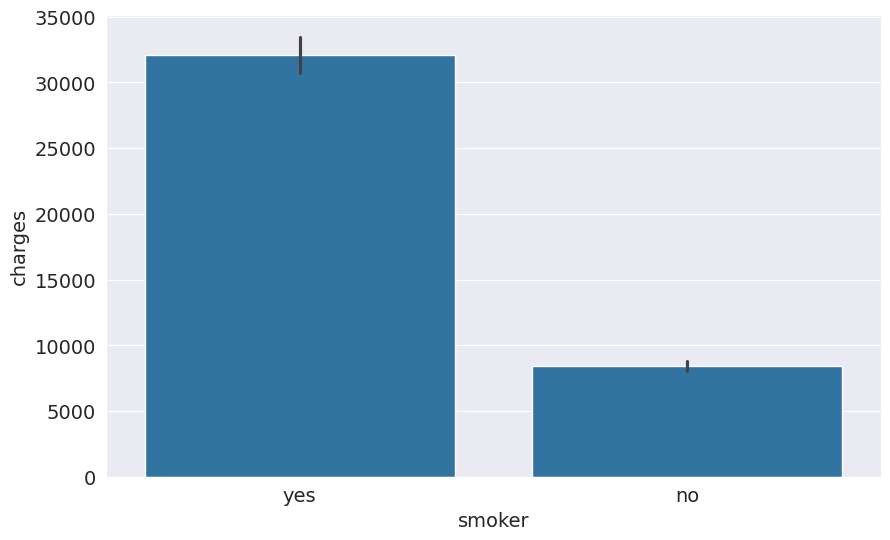

In [ ]:
sns.barplot(medical_df,x="smoker",y="charges")

In [ ]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


We can now use the smoker_df column for linear regression.

charges=w1×age+w2×bmi+w3×children+w4×smoker+bcharges=w1​×age+w2​×bmi+w3​×children+w4​×smoker+b

In [ ]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children','smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


The loss reduces from 11355 to 6056, almost by 50%! This is an important lesson: never ignore categorical data.

Let's try adding the "sex" column as well.

charges=w1×age+w2×bmi+w3×children+w4×smoker+w5×sex+bcharges=w1​×age+w2​×bmi+w3​×children+w4​×smoker+w5​×sex+b

<Axes: xlabel='sex', ylabel='charges'>

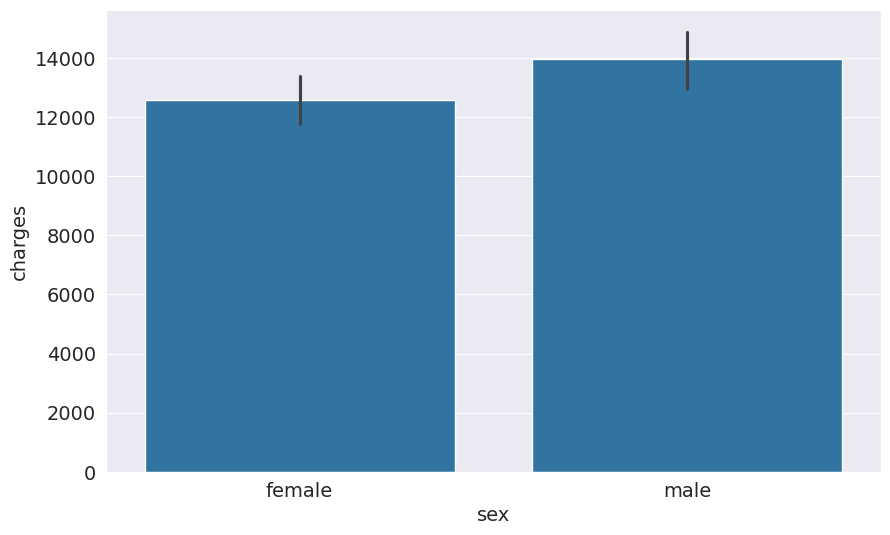

In [ ]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [ ]:
sex_codes = {'female': 0, 'male': 1}

In [ ]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [ ]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025484

In [ ]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children','smoker_code','sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


#One hot encoding


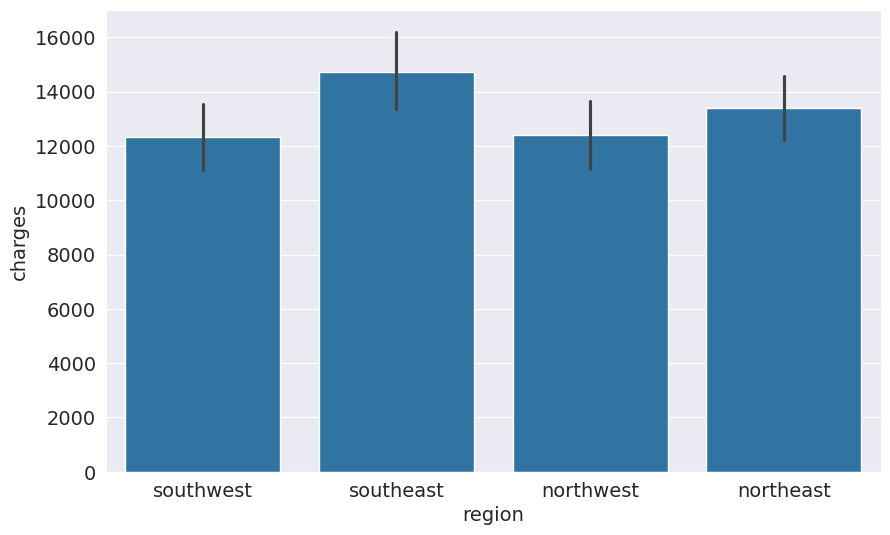

In [ ]:
sns.barplot(data=medical_df, x='region', y='charges');

In [ ]:
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()
enc.fit(medical_df[["region"]])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
one_hot=enc.transform(medical_df[["region"]]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [ ]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']]=one_hot

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


Let's include the region columns into our linear regression model.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [ ]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


Once again, this leads to a fairly small reduction in the loss.


# EXERCISE: Are two separate linear regression models, one for smokers and one of non-smokers, better than a single linear regression model? Why or why not? Try it out and see if you can justify your answer with data.



#feature scaling

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])